In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.cluster import KMeans
from collections import defaultdict
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from keras import models
from keras import layers
from keras import optimizers

from matplotlib.legend_handler import HandlerLine2D
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

%matplotlib inline

## Data Preprocessing for ML model

In [2]:
## Read Data1 and Data2 and select data set
D1 = pd.read_csv('Data/df_all_onehot_dropcol_fillyear_micerate.csv')
D2 = pd.read_csv('Data/df_all_ordinal_dropcol_fillyear_micerate.csv')
df_data = D1

In [3]:
## 1) Resume to train/test data for onehot data

df_train= df_data[:75757]
df_wids_test= df_data[75757:]
print(df_train.shape)
print(df_wids_test.shape)
df_train.columns

(75757, 126)
(9705, 126)


Index(['Year_Factor', 'floor_area', 'year_built', 'energy_star_rating',
       'ELEVATION', 'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp',
       ...
       'facility_type_Warehouse_Uncategorized', 'State_Factor_State_1',
       'State_Factor_State_10', 'State_Factor_State_11',
       'State_Factor_State_2', 'State_Factor_State_4', 'State_Factor_State_6',
       'State_Factor_State_8', 'building_class_Commercial',
       'building_class_Residential'],
      dtype='object', length=126)

In [4]:
## Split X, y
X = df_train.drop(['site_eui', 'id'], axis=1)
y = df_train['site_eui']
print (X.shape)
print (y.shape)
X.head()

(75757, 124)
(75757,)


,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,facility_type_Warehouse_Uncategorized,State_Factor_State_1,State_Factor_State_10,State_Factor_State_11,State_Factor_State_2,State_Factor_State_4,State_Factor_State_6,State_Factor_State_8,building_class_Commercial,building_class_Residential
0,1,61242.0,1942.0,11.0,2.4,36,50.5,68,35,50.589286,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,274000.0,1955.0,45.0,1.8,36,50.5,68,35,50.589286,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,280025.0,1951.0,97.0,1.8,36,50.5,68,35,50.589286,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,55325.0,1980.0,46.0,1.8,36,50.5,68,35,50.589286,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,66000.0,1985.0,100.0,2.4,36,50.5,68,35,50.589286,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [5]:
#Split data to 
# (1) train_all, test (80/20)
# (2) train, validation and test  (60/20/20)
X_train_all, X_test, y_train_all, y_test =  train_test_split(X,y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val =  train_test_split(X_train_all,y_train_all, test_size=0.25, random_state=42)

In [6]:
#Count number of instances
print ("X_train_all= ", X_train_all.shape)
print ("X_train= ", X_train.shape)
print ("X_val= ", X_val.shape)
print ("X_test= ", X_test.shape)
print ("y_train_all= ", y_train_all.shape)
print ("y_train= ", y_train.shape)
print ("y_val= ", y_val.shape)
print ("y_test= ", y_test.shape)

X_train_all=  (60605, 124)
X_train=  (45453, 124)
X_val=  (15152, 124)
X_test=  (15152, 124)
y_train_all=  (60605,)
y_train=  (45453,)
y_val=  (15152,)
y_test=  (15152,)


### Scaled for X datasets based on training data

In [163]:
### Scaling data based(based on training set)  
scaler = MinMaxScaler()
X_train_all_scaled = scaler.fit_transform(X_train_all)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
df_wids_test_scaled = scaler.transform(df_wids_test.drop(['site_eui', 'id'], axis=1))

## ML models (Start with simplist model)
##### 1) Regressions
##### 2) XGBoost Models
##### 3) Neural networks

In [8]:
## Prediction accuracy
import sklearn.metrics as metrics
  
def prediction_result(y_true, y_pred):
    explained_variance = metrics.explained_variance_score(y_true, y_pred)
    mean_ae = metrics.mean_absolute_error(y_true, y_pred)
    mse = metrics.mean_squared_error(y_true, y_pred)
   # median_ae = metrics_median_absolute_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)
    rmse = round(np.sqrt(mse), 5)
    
    print ('Explained variance: ', round(explained_variance, 5))
    print ('Mean Absolute Error: ', round(mean_ae, 5))
   # print ('Median Absolute Error: ', round(median_ae, 5))
    print ('Mean Square Error: ', round(mse, 5))
    print ('RMSE: ', rmse)
    print ('R2 score: ', round(r2, 5))
    
    return rmse
    

### ML: XGBoost

In [9]:
## Step1: Test Baseline of XGBoostRegression (use only X_train to predict y_val) if use Data1
from xgboost import XGBRegressor

xgbre = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
xgbre.fit(X_train_scaled, y_train)

# Predict
y_pred_xgbre = pd.DataFrame(xgbre.predict(X_val_scaled), index=y_val.index)

dump = prediction_result(y_val, y_pred_xgbre)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Explained variance:  0.56018
Mean Absolute Error:  20.16662
Mean Square Error:  1400.56459
RMSE:  37.42412
R2 score:  0.56014


In [10]:
## XGBoostRegression (use only X_train to predict y_test) if use Data1
from xgboost import XGBRegressor

xgbre = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
xgbre.fit(X_train_scaled, y_train)

# Predict
y_pred_xgbre = pd.DataFrame(xgbre.predict(X_test_scaled), index=y_test.index)

dump = prediction_result(y_test, y_pred_xgbre)

Explained variance:  0.5179
Mean Absolute Error:  20.45262
Mean Square Error:  1650.95139
RMSE:  40.6319
R2 score:  0.5179


In [11]:
## XGBoostRegression (use X_train_all to predict y_test) if use Data1
from xgboost import XGBRegressor

xgbre = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
xgbre.fit(X_train_all_scaled, y_train_all)

# Predict
y_pred_xgbre = pd.DataFrame(xgbre.predict(X_test_scaled), index=y_test.index)

dump = prediction_result(y_test, y_pred_xgbre)

Explained variance:  0.55815
Mean Absolute Error:  19.65578
Mean Square Error:  1513.12495
RMSE:  38.89891
R2 score:  0.55815


In [279]:
## Step1: Test Baseline of XGBoostRegression (use only X_train to predict y_val) if use Data2
from xgboost import XGBRegressor

xgbre = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
xgbre.fit(X_train_scaled, y_train)

# Predict
y_pred_xgbre = pd.DataFrame(xgbre.predict(X_val_scaled), index=y_val.index)

dump = prediction_result(y_val, y_pred_xgbre)

Explained variance:  0.54248
Mean Absolute Error:  20.58946
Mean Square Error:  1457.10772
RMSE:  38.17208
R2 score:  0.54239


In [280]:
## XGBoostRegression (use only X_train to predict y_test) if use Data2
from xgboost import XGBRegressor

xgbre = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
xgbre.fit(X_train_scaled, y_train)

# Predict
y_pred_xgbre = pd.DataFrame(xgbre.predict(X_test_scaled), index=y_test.index)

dump = prediction_result(y_test, y_pred_xgbre)

Explained variance:  0.50598
Mean Absolute Error:  20.8559
Mean Square Error:  1691.7787
RMSE:  41.13124
R2 score:  0.50598


In [281]:
## XGBoostRegression (use X_train_all to predict y_test) if use Data2
from xgboost import XGBRegressor

xgbre = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
xgbre.fit(X_train_all_scaled, y_train_all)

# Predict
y_pred_xgbre = pd.DataFrame(xgbre.predict(X_test_scaled), index=y_test.index)

dump = prediction_result(y_test, y_pred_xgbre)

Explained variance:  0.55131
Mean Absolute Error:  20.08931
Mean Square Error:  1536.55695
RMSE:  39.19894
R2 score:  0.55131


<BarContainer object of 124 artists>

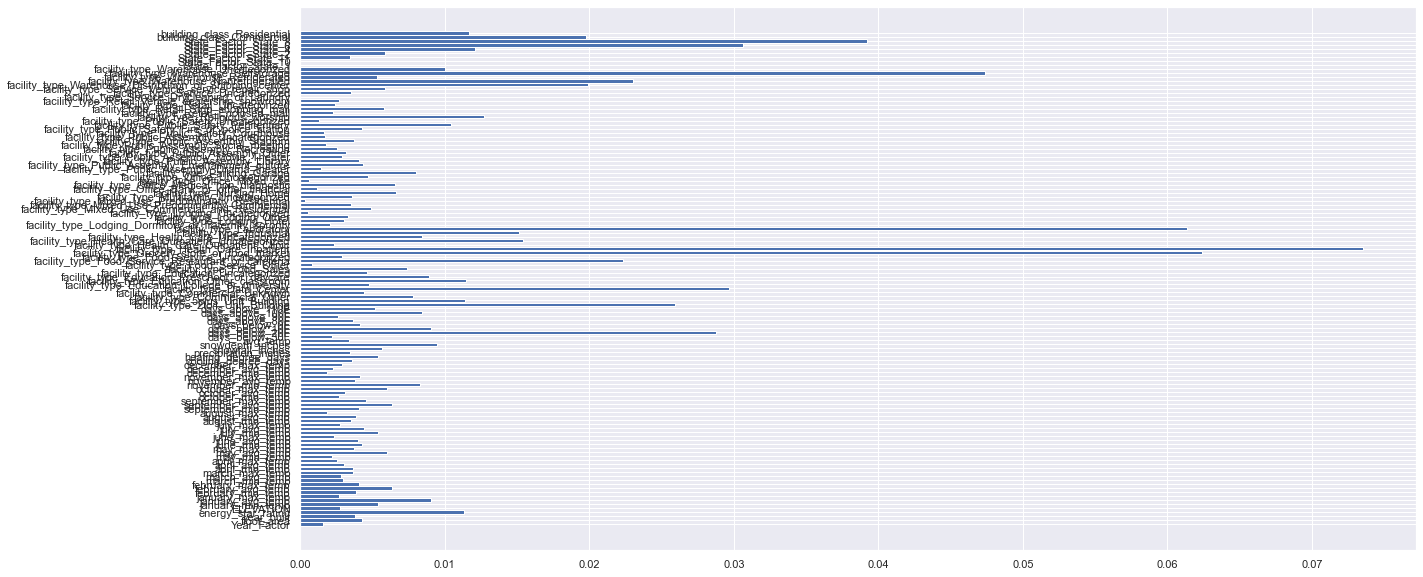

In [12]:
## get feature importances
xgbre.feature_importances_
plt.figure(figsize=(20,10))
plt.barh(pd.Series(X.columns), xgbre.feature_importances_)


Text(0.5, 1.0, 'Top 10 features from XGBoost')

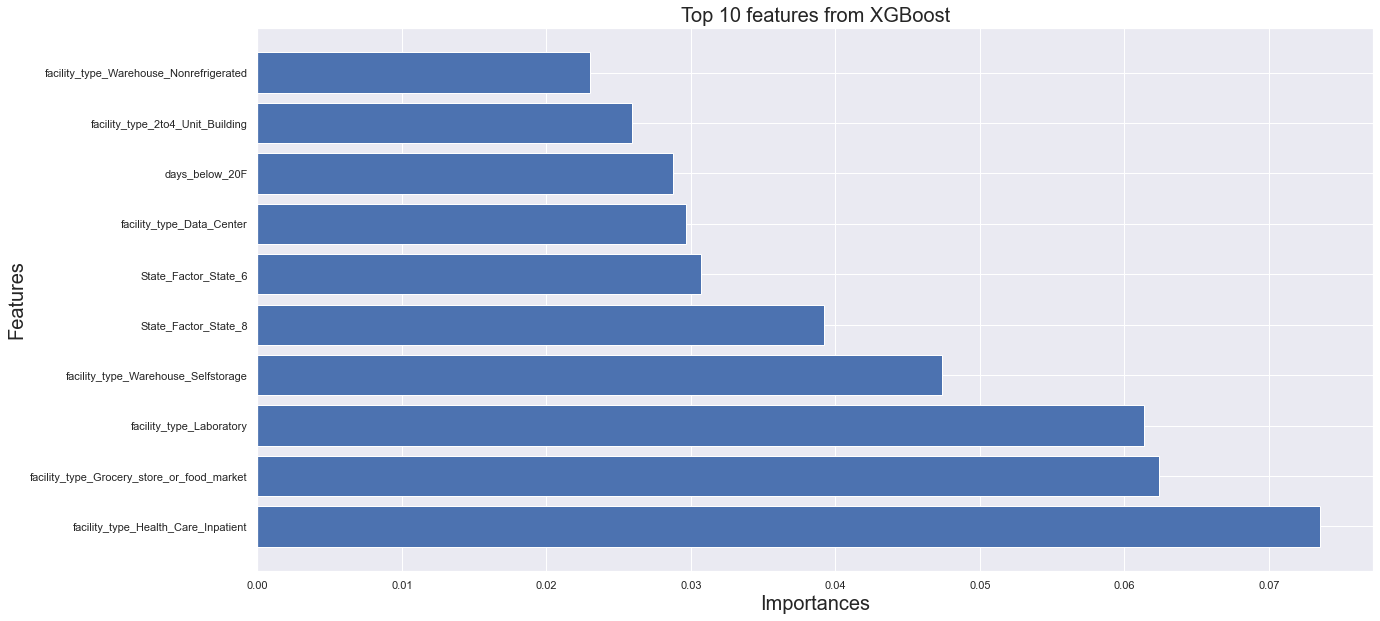

In [263]:
## use data frame to sort feature_importance 
frame = { 'Features': pd.Series(X.columns), 'Importances': xgbre.feature_importances_}  
df_feature_importance = pd.DataFrame(frame)
df_feature_importance_sort = df_feature_importance.sort_values(by=['Importances'],ascending=False, ignore_index=True)
plt.figure(figsize=(20,10))
plt.barh(df_feature_importance_sort['Features'].head(10), df_feature_importance_sort['Importances'].head(10))
plt.xlabel("Importances", fontsize=20)
plt.ylabel("Features", fontsize=20)
plt.title('Top 10 features from XGBoost', fontsize=20)

In [40]:
xgre_importance = df_feature_importance_sort['Features'].head(10)
xgre_importance

0           facility_type_Health_Care_Inpatient
1    facility_type_Grocery_store_or_food_market
2                      facility_type_Laboratory
3           facility_type_Warehouse_Selfstorage
4                          State_Factor_State_8
5                          State_Factor_State_6
6                     facility_type_Data_Center
7                                days_below_20F
8              facility_type_2to4_Unit_Building
9       facility_type_Warehouse_Nonrefrigerated
Name: Features, dtype: object

## Model-2: Random Forest 

In [32]:
## dimensional reduction1: use Random forest to find the importan features
n_estimates = list(np.arange(5,100,5))
rfre = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=0)
rfre.fit(X_train_all_scaled, y_train_all)

# Predict
y_pred_rfre = pd.DataFrame(rfre.predict(X_val_scaled), index=y_val.index)

dump = prediction_result(y_val, y_pred_xgbre)

Explained variance:  -0.65114
Mean Absolute Error:  45.15628
Mean Square Error:  5257.45571
RMSE:  72.50831
R2 score:  -0.65114


<BarContainer object of 124 artists>

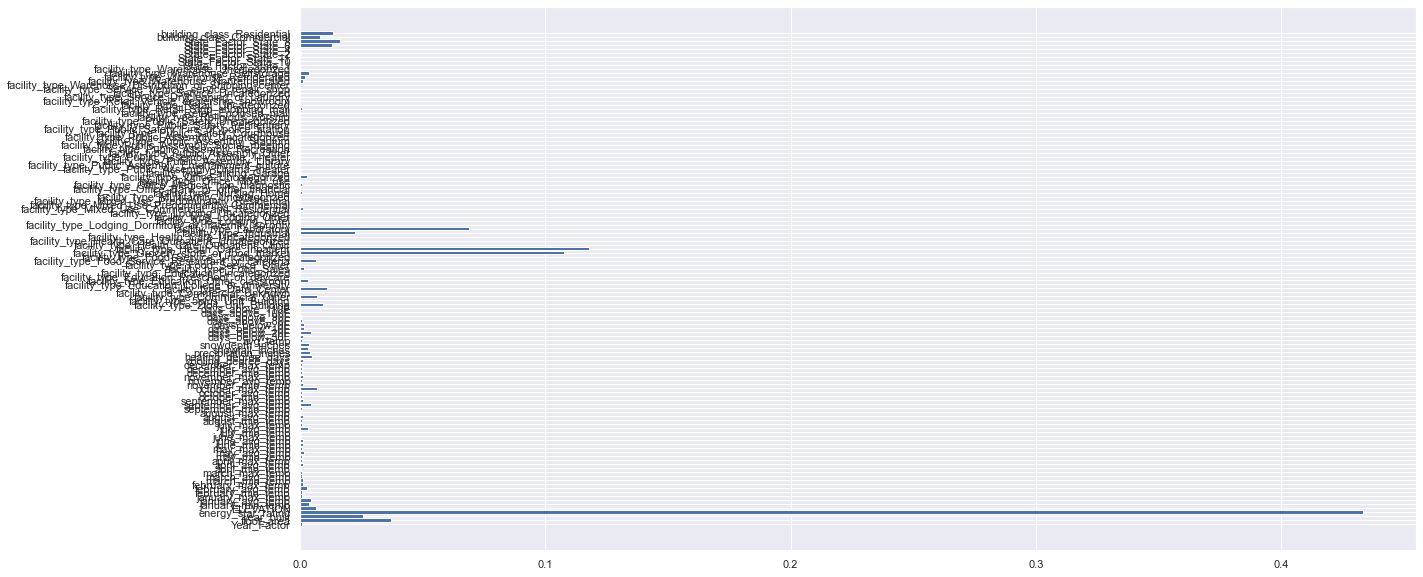

In [33]:
# get feature importance from random forest
rfre_imp = rfre.feature_importances_
rfre_imp 
plt.figure(figsize=(20,10))
plt.barh(pd.Series(X.columns), rfre.feature_importances_)

Text(0.5, 1.0, 'Top 10 features from Random Forest')

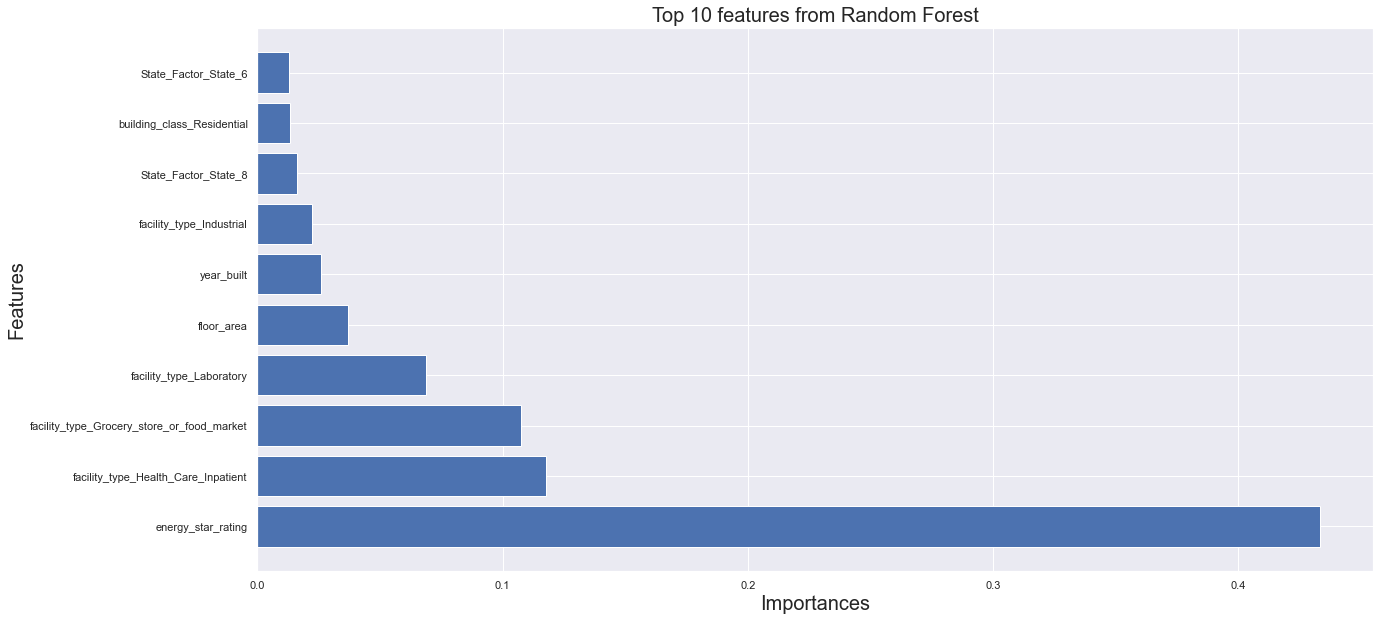

In [262]:
## use data frame to sort feature_importance 
frame = { 'Features': pd.Series(X.columns), 'Importances': rfre.feature_importances_}  
df_rf_feature_importance = pd.DataFrame(frame)
df_rf_feature_importance_sort = df_rf_feature_importance.sort_values(by=['Importances'],ascending=False, ignore_index=True)
plt.figure(figsize=(20,10))
plt.barh(df_rf_feature_importance_sort['Features'].head(10), df_rf_feature_importance_sort['Importances'].head(10))
plt.xlabel("Importances", fontsize=20)
plt.ylabel("Features", fontsize=20)
plt.title('Top 10 features from Random Forest', fontsize=20)

In [39]:
rfre_importance = df_rf_feature_importance_sort['Features'].head(10)
rfre_importance

0                            energy_star_rating
1           facility_type_Health_Care_Inpatient
2    facility_type_Grocery_store_or_food_market
3                      facility_type_Laboratory
4                                    floor_area
5                                    year_built
6                      facility_type_Industrial
7                          State_Factor_State_8
8                    building_class_Residential
9                          State_Factor_State_6
Name: Features, dtype: object

## Model-3: NN

In [29]:
import tensorflow as tf
from keras import models
from keras import layers
#from keras import dropout
from tensorflow.keras.layers import Dropout


In [203]:
nn = models.Sequential()
nn.add(layers.Dense(64, activation='relu', input_shape=(124,)))
nn.add(Dropout(0.4, input_shape=(64,)))
nn.add(layers.Dense(32, activation='relu'))
nn.add(Dropout(0.4, input_shape=(32,)))
nn.add(layers.Dense(32, activation='relu'))
nn.add(Dropout(0.4, input_shape=(32,)))
nn.add(layers.Dense(1, activation='relu'))
nn.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_67 (Dense)            (None, 64)                8000      
                                                                 
 dropout_36 (Dropout)        (None, 64)                0         
                                                                 
 dense_68 (Dense)            (None, 32)                2080      
                                                                 
 dropout_37 (Dropout)        (None, 32)                0         
                                                                 
 dense_69 (Dense)            (None, 32)                1056      
                                                                 
 dropout_38 (Dropout)        (None, 32)                0         
                                                                 
 dense_70 (Dense)            (None, 1)               

In [204]:
import tensorflow as tf 
opt = tf.optimizers.Adam(learning_rate=0.1)
#opt = keras.optimizers.Adam(learning_rate=0.01)
nn.compile(optimizer=opt, loss='mean_squared_error', metrics=['mse'])
#history = nn.fit(X_train_all_scaled, y_train_all, epochs=20, batch_size=50,  validation_split=0.2)

history = nn.fit(X_train_scaled, y_train, epochs=20, batch_size=50, verbose = True, validation_data=(X_val_scaled, y_val))

Epoch 1/20
910/910 [==============================] - 2s 1ms/step - loss: 3801.2234 - mse: 3801.2234 - val_loss: 3188.7476 - val_mse: 3188.7476
Epoch 2/20
910/910 [==============================] - 1s 1ms/step - loss: 3564.7925 - mse: 3564.7925 - val_loss: 3205.3379 - val_mse: 3205.3379
Epoch 3/20
910/910 [==============================] - 1s 1ms/step - loss: 3537.8899 - mse: 3537.8899 - val_loss: 3227.6980 - val_mse: 3227.6980
Epoch 4/20
910/910 [==============================] - 1s 1ms/step - loss: 3516.3894 - mse: 3516.3892 - val_loss: 3261.4670 - val_mse: 3261.4670
Epoch 5/20
910/910 [==============================] - 1s 2ms/step - loss: 3486.6162 - mse: 3486.6160 - val_loss: 3193.5217 - val_mse: 3193.5217
Epoch 6/20
910/910 [==============================] - 1s 1ms/step - loss: 3481.6001 - mse: 3481.6001 - val_loss: 3186.6560 - val_mse: 3186.6560
Epoch 7/20
910/910 [==============================] - 1s 1ms/step - loss: 3464.0737 - mse: 3464.0737 - val_loss: 3188.5930 - val_mse: 31

In [206]:
# Predict
y_pred_nn = pd.DataFrame(nn.predict(X_test_scaled), index=y_test.index)
print (y_pred_nn.shape)
dump = prediction_result(y_test, y_pred_nn)

(15152, 1)
Explained variance:  0.0
Mean Absolute Error:  33.86365
Mean Square Error:  3424.51836
RMSE:  58.51938
R2 score:  -0.0


dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


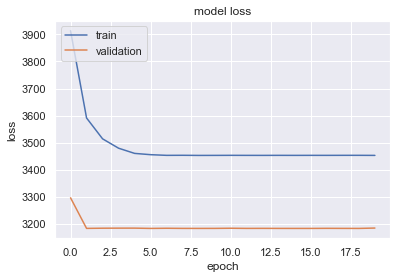

In [197]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [131]:
#nn_pred_y = nn.predict(X_test_scaled)

# Predict
y_pred_nn = pd.DataFrame(nn.predict(X_test_scaled), index=y_test.index)

dump = prediction_result(y_test, y_pred_nn)

Explained variance:  0.31344
Mean Absolute Error:  26.74261
Mean Square Error:  2351.44373
RMSE:  48.49169
R2 score:  0.31335


## 2nd NN model

In [135]:
from keras.wrappers.scikit_learn import KerasRegressor
import eli5
from eli5.sklearn import PermutationImportance

In [215]:
def create_my_ann(input_dim, output_dim, hidden_neurons):
    model = models.Sequential()
    model.add(layers.Dense(hidden_neurons, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.15))
    model.add(layers.Dense(hidden_neurons, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.15))
    model.add(layers.Dense(hidden_neurons, input_dim=hidden_neurons, activation='relu'))
    model.add(layers.Dense(output_dim))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [216]:
model = KerasRegressor(build_fn=create_my_ann, input_dim=X_test_scaled.shape[1], output_dim=1, hidden_neurons=32, epochs=500, batch_size=50, verbose=True)
history = model.fit(X_train_all_scaled, y_train_all)

# Predict
y_pred_nn2 = pd.DataFrame(nn.predict(X_test_scaled), index=y_test.index)
print (y_pred_nn2.shape)
dump = prediction_result(y_test, y_pred_nn2)

Epoch 1/500


/var/folders/rx/gncdv4lj3w51g3gtm2z1qfg40000gn/T/ipykernel_89946/782883438.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_my_ann, input_dim=X_test_scaled.shape[1], output_dim=1, hidden_neurons=32, epochs=500, batch_size=50, verbose=True)


1213/1213 [==============================] - 2s 1ms/step - loss: 3303.4666
Epoch 2/500
1213/1213 [==============================] - 1s 1ms/step - loss: 2345.1982
Epoch 3/500
1213/1213 [==============================] - 1s 1ms/step - loss: 2260.1692
Epoch 4/500
1213/1213 [==============================] - 1s 1ms/step - loss: 2214.3494
Epoch 5/500
1213/1213 [==============================] - 1s 1ms/step - loss: 2211.2898
Epoch 6/500
1213/1213 [==============================] - 1s 1ms/step - loss: 2181.1394
Epoch 7/500
1213/1213 [==============================] - 1s 1ms/step - loss: 2157.1272
Epoch 8/500
1213/1213 [==============================] - 1s 1ms/step - loss: 2160.3286
Epoch 9/500
1213/1213 [==============================] - 1s 1ms/step - loss: 2145.2104
Epoch 10/500
1213/1213 [==============================] - 1s 1ms/step - loss: 2135.9128
Epoch 11/500
1213/1213 [==============================] - 1s 1ms/step - loss: 2141.7212
Epoch 12/500
1213/1213 [=============================

1213/1213 [==============================] - 1s 1ms/step - loss: 1991.3652
Epoch 95/500
1213/1213 [==============================] - 1s 1ms/step - loss: 1973.4733
Epoch 96/500
1213/1213 [==============================] - 1s 1ms/step - loss: 1980.9253
Epoch 97/500
1213/1213 [==============================] - 1s 1ms/step - loss: 1976.0750
Epoch 98/500
1213/1213 [==============================] - 1s 1ms/step - loss: 1989.6985
Epoch 99/500
1213/1213 [==============================] - 1s 1ms/step - loss: 1980.6809
Epoch 100/500
1213/1213 [==============================] - 1s 1ms/step - loss: 1982.6577
Epoch 101/500
1213/1213 [==============================] - 1s 1ms/step - loss: 1970.7629
Epoch 102/500
1213/1213 [==============================] - 1s 1ms/step - loss: 1979.5359
Epoch 103/500
1213/1213 [==============================] - 1s 1ms/step - loss: 1976.7988
Epoch 104/500
1213/1213 [==============================] - 2s 1ms/step - loss: 1992.1664
Epoch 105/500
1213/1213 [===============

1213/1213 [==============================] - 1s 1ms/step - loss: 1905.6018
Epoch 187/500
1213/1213 [==============================] - 1s 1ms/step - loss: 1916.9152
Epoch 188/500
1213/1213 [==============================] - 1s 1ms/step - loss: 1908.7405
Epoch 189/500
1213/1213 [==============================] - 1s 1ms/step - loss: 1909.6586
Epoch 190/500
1213/1213 [==============================] - 1s 1ms/step - loss: 1885.8757
Epoch 191/500
1213/1213 [==============================] - 1s 1ms/step - loss: 1910.2894
Epoch 192/500
1213/1213 [==============================] - 1s 1ms/step - loss: 1910.9696
Epoch 193/500
1213/1213 [==============================] - 1s 1ms/step - loss: 1911.9452
Epoch 194/500
1213/1213 [==============================] - 1s 1ms/step - loss: 1910.0144
Epoch 195/500
1213/1213 [==============================] - 1s 1ms/step - loss: 1891.2120
Epoch 196/500
1213/1213 [==============================] - 1s 1ms/step - loss: 1896.0012
Epoch 197/500
1213/1213 [==========

1213/1213 [==============================] - 1s 1ms/step - loss: 1877.0747
Epoch 279/500
1213/1213 [==============================] - 2s 1ms/step - loss: 1883.2378
Epoch 280/500
1213/1213 [==============================] - 2s 1ms/step - loss: 1879.8241
Epoch 281/500
1213/1213 [==============================] - 2s 1ms/step - loss: 1876.7114
Epoch 282/500
1213/1213 [==============================] - 1s 1ms/step - loss: 1868.6613
Epoch 283/500
1213/1213 [==============================] - 1s 1ms/step - loss: 1871.4312
Epoch 284/500
1213/1213 [==============================] - 1s 1ms/step - loss: 1889.2245
Epoch 285/500
1213/1213 [==============================] - 1s 1ms/step - loss: 1890.3446
Epoch 286/500
1213/1213 [==============================] - 1s 1ms/step - loss: 1864.9581
Epoch 287/500
1213/1213 [==============================] - 1s 1ms/step - loss: 1867.2867
Epoch 288/500
1213/1213 [==============================] - 1s 1ms/step - loss: 1872.8484
Epoch 289/500
1213/1213 [==========

1213/1213 [==============================] - 1s 1ms/step - loss: 1859.5731
Epoch 371/500
1213/1213 [==============================] - 1s 1ms/step - loss: 1867.6064
Epoch 372/500
1213/1213 [==============================] - 1s 1ms/step - loss: 1875.4589
Epoch 373/500
1213/1213 [==============================] - 1s 1ms/step - loss: 1853.2944
Epoch 374/500
1213/1213 [==============================] - 1s 1ms/step - loss: 1862.6345
Epoch 375/500
1213/1213 [==============================] - 1s 1ms/step - loss: 1874.5835
Epoch 376/500
1213/1213 [==============================] - 1s 1ms/step - loss: 1858.3737
Epoch 377/500
1213/1213 [==============================] - 1s 1ms/step - loss: 1858.6400
Epoch 378/500
1213/1213 [==============================] - 1s 1ms/step - loss: 1861.6445
Epoch 379/500
1213/1213 [==============================] - 1s 1ms/step - loss: 1860.7374
Epoch 380/500
1213/1213 [==============================] - 1s 1ms/step - loss: 1879.4095
Epoch 381/500
1213/1213 [==========

1213/1213 [==============================] - 1s 1ms/step - loss: 1846.3420
Epoch 463/500
1213/1213 [==============================] - 1s 1ms/step - loss: 1854.9305
Epoch 464/500
1213/1213 [==============================] - 1s 1ms/step - loss: 1849.8414
Epoch 465/500
1213/1213 [==============================] - 2s 1ms/step - loss: 1864.9042
Epoch 466/500
1213/1213 [==============================] - 1s 1ms/step - loss: 1849.2493
Epoch 467/500
1213/1213 [==============================] - 1s 1ms/step - loss: 1867.2361
Epoch 468/500
1213/1213 [==============================] - 1s 1ms/step - loss: 1866.2136
Epoch 469/500
1213/1213 [==============================] - 1s 1ms/step - loss: 1846.2053
Epoch 470/500
1213/1213 [==============================] - 1s 1ms/step - loss: 1840.4037
Epoch 471/500
1213/1213 [==============================] - 1s 1ms/step - loss: 1840.7786
Epoch 472/500
1213/1213 [==============================] - 1s 1ms/step - loss: 1854.4622
Epoch 473/500
1213/1213 [==========

In [217]:
# Predict
y_pred_nn2 = pd.DataFrame(model.predict(X_test_scaled), index=y_test.index)
print (y_pred_nn2.shape)
dump = prediction_result(y_test, y_pred_nn2)

304/304 [==============================] - 0s 868us/step
(15152, 1)
Explained variance:  0.41241
Mean Absolute Error:  22.62374
Mean Square Error:  2040.65422
RMSE:  45.1736
R2 score:  0.4041


dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


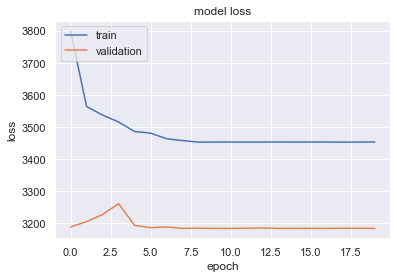

In [212]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [220]:
## show feature importances
perm = PermutationImportance(model, random_state=1).fit(X_train_all_scaled,y_train_all)


1213/1213 [==============================] - 1s 735us/step - loss: 1878.9371


1213/1213 [==============================] - 1s 742us/step - loss: 1859.1221


1213/1213 [==============================] - 1s 714us/step - loss: 1928.0974


1213/1213 [==============================] - 1s 684us/step - loss: 1873.2217


1213/1213 [==============================] - 1s 772us/step - loss: 1863.0789


1213/1213 [==============================] - 1s 703us/step - loss: 2118.5884


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [269]:
eli5.show_weights(perm, feature_names = X.columns.tolist())

Weight,Feature
1314.1689 ± 49.5951,energy_star_rating
695.7425 ± 32.2435,facility_type_Office_Uncategorized
555.6772 ± 5.5833,facility_type_Education_Other_classroom
472.9895 ± 26.4968,facility_type_Multifamily_Uncategorized
393.1038 ± 6.6959,facility_type_Warehouse_Nonrefrigerated
275.5253 ± 41.7210,State_Factor_State_6
257.4542 ± 14.4952,building_class_Residential
220.3955 ± 3.2920,facility_type_2to4_Unit_Building
179.0152 ± 13.8666,building_class_Commercial
166.2861 ± 10.5224,facility_type_5plus_Unit_Building


In [270]:

d = {'NN': ["energy_star_rating", "facility_type_Office_Uncategorized","facility_type_Education_Other_classroom",
            "facility_type_Multifamily_Uncategorized","facility_type_Warehouse_Nonrefrigerated","State_Factor_State_6",
            "building_class_Residential","facility_type_2to4_Unit_Building","building_class_Commercial","facility_type_5plus_Unit_Building"]}
df_NN_feature_importances = pd.DataFrame(data=d)
df_NN_feature_importances

,NN
0,energy_star_rating
1,facility_type_Office_Uncategorized
2,facility_type_Education_Other_classroom
3,facility_type_Multifamily_Uncategorized
4,facility_type_Warehouse_Nonrefrigerated
5,State_Factor_State_6
6,building_class_Residential
7,facility_type_2to4_Unit_Building
8,building_class_Commercial
9,facility_type_5plus_Unit_Building


## Compare top 10 features from different models

In [273]:
df_train.shape

(75757, 126)

In [279]:
corr_df_train = df_train.corr()
## Question: Find Top 10 correlation attributes
## sort the correlation between features and 'site_eui'
print (corr_df_train['site_eui'].sort_values().head(6))
print (corr_df_train['site_eui'].sort_values().tail(7))

energy_star_rating      -0.384298
january_min_temp        -0.179190
january_avg_temp        -0.167982
february_avg_temp       -0.154071
State_Factor_State_11   -0.149263
february_min_temp       -0.147348
Name: site_eui, dtype: float64
days_below_30F                                0.139811
heating_degree_days                           0.147861
snowfall_inches                               0.157284
facility_type_Laboratory                      0.159372
facility_type_Health_Care_Inpatient           0.209634
facility_type_Grocery_store_or_food_market    0.209918
site_eui                                      1.000000
Name: site_eui, dtype: float64


In [280]:
dcor = {'Corr': ["energy_star_rating", "facility_type_Grocery_store_or_food_market","facility_type_Health_Care_Inpatient",
            "january_min_temp", "facility_type_Laboratory", "january_avg_temp","snowfall_inches",
            "february_avg_temp ","State_Factor_State_11","heating_degree_days"]}
df_corr_feature_importances = pd.DataFrame(data=dcor)
df_corr_feature_importances

,Corr
0,energy_star_rating
1,facility_type_Grocery_store_or_food_market
2,facility_type_Health_Care_Inpatient
3,january_min_temp
4,facility_type_Laboratory
5,january_avg_temp
6,snowfall_inches
7,february_avg_temp
8,State_Factor_State_11
9,heating_degree_days


In [282]:
## Combine Mean and Std of site_eui groupby state_factor
frame = {'Corr':df_corr_feature_importances['Corr'],
         'XGB': df_feature_importance_sort['Features'].head(10), 
         'RF': df_rf_feature_importance_sort['Features'].head(10),
         'NN': df_NN_feature_importances['NN']}  
df_features = pd.DataFrame(frame)
#df_state_ana_sort = df_state_ana.sort_values('Mean')
df_features

,Corr,XGB,RF,NN
0,energy_star_rating,facility_type_Health_Care_Inpatient,energy_star_rating,energy_star_rating
1,facility_type_Grocery_store_or_food_market,facility_type_Grocery_store_or_food_market,facility_type_Health_Care_Inpatient,facility_type_Office_Uncategorized
2,facility_type_Health_Care_Inpatient,facility_type_Laboratory,facility_type_Grocery_store_or_food_market,facility_type_Education_Other_classroom
3,january_min_temp,facility_type_Warehouse_Selfstorage,facility_type_Laboratory,facility_type_Multifamily_Uncategorized
4,facility_type_Laboratory,State_Factor_State_8,floor_area,facility_type_Warehouse_Nonrefrigerated
5,january_avg_temp,State_Factor_State_6,year_built,State_Factor_State_6
6,snowfall_inches,facility_type_Data_Center,facility_type_Industrial,building_class_Residential
7,february_avg_temp,days_below_20F,State_Factor_State_8,facility_type_2to4_Unit_Building
8,State_Factor_State_11,facility_type_2to4_Unit_Building,building_class_Residential,building_class_Commercial
9,heating_degree_days,facility_type_Warehouse_Nonrefrigerated,State_Factor_State_6,facility_type_5plus_Unit_Building


#### Q3 finding1: most of the top 10 important features of xgboost, random forest and neural network models are mostly belong to facility_type. It indicates the facility_type is the top important feature here
#### Q3_finding2: The second important features are the state related columns. It is worth to discuss the influence from the state_factor further

## Discuss state_factor v.s. site_eui

In [14]:
df_state_train = pd.read_csv('Data/train.csv')
df_state_train.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [228]:
## get means of site_eui by state_factors
df_state_mean = df_state_train.groupby('State_Factor').mean()['site_eui']
df_state_mean

State_Factor
State_1     62.196194
State_10    68.597082
State_11    53.989234
State_2     77.873978
State_4     95.199291
State_6     87.481012
State_8     87.416018
Name: site_eui, dtype: float64

In [229]:
## get std of site_eui by state_factors
df_state_std = df_state_train.groupby('State_Factor').std()['site_eui']
df_state_std

State_Factor
State_1     60.968325
State_10    25.307113
State_11    60.133620
State_2     55.185415
State_4     65.187002
State_6     53.404194
State_8     82.610348
Name: site_eui, dtype: float64

In [235]:
df_state_ana_sort['Mean']

State_Factor
State_11    53.989234
State_1     62.196194
State_10    68.597082
State_2     77.873978
State_8     87.416018
State_6     87.481012
State_4     95.199291
Name: Mean, dtype: float64

In [234]:
## Combine Mean and Std of site_eui groupby state_factor
frame = {'Mean': df_state_mean, 'Std': df_state_std}  
df_state_ana = pd.DataFrame(frame)
df_state_ana_sort = df_state_ana.sort_values('Mean')
print (df_state_ana_sort)

                   Mean        Std
State_Factor                      
State_11      53.989234  60.133620
State_1       62.196194  60.968325
State_10      68.597082  25.307113
State_2       77.873978  55.185415
State_8       87.416018  82.610348
State_6       87.481012  53.404194
State_4       95.199291  65.187002


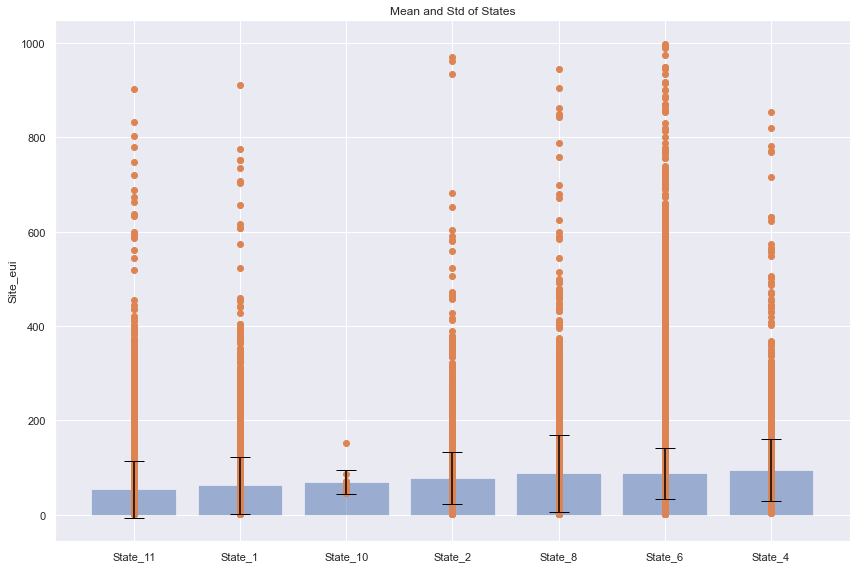

In [258]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(df_state_ana_sort.index, df_state_ana_sort['Mean'], yerr=df_state_ana_sort['Std'], align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Site_eui')
ax.set_xticks(df_state_ana_sort.index)
ax.set_xticklabels(df_state_ana_sort.index)
ax.set_title('Mean and Std of States')
ax.yaxis.grid(True)


plt.scatter(df_state_train['State_Factor'], df_state_train['site_eui'])
#plt.figure(figsize=(12, 4))
# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()



In [17]:
## site_eui distribution per state
df_state1 = df_state_train.loc[df_state_train['State_Factor'] == 'State_1']
df_state1.shape

#df_com_year_mean = df_commercial.groupby('year_built').mean()['site_eui']
#df_com_year_mean.plot(kind='bar', figsize=(20,4), title = 'Site eui_mean v.s. year built for Commercial buildings')


(5618, 64)

<ErrorbarContainer object of 3 artists>

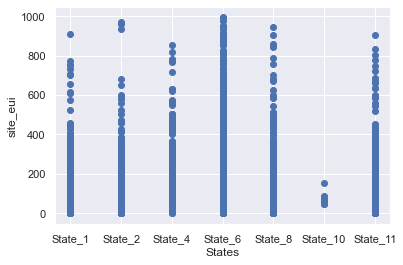

In [249]:
x = df_state_train['State_Factor']
y = df_state_train['site_eui']


plt.scatter(x, y)
plt.xlabel('States')
plt.ylabel('site_eui')
#plt.errorbar(df_state_ana_sort.index, df_state_ana_sort['Mean'], df_state_ana_sort['Std'], linestyle='None', marker='^')


  # show color scale

In [219]:
## predict submisstion 
#df_test_final =  df_wids_test.drop(['site_eui', 'id'], axis=1)
y_final_pred = model.predict(df_wids_test_scaled)
df_sub = y_final_pred

frame = { 'id': df_wids_test.index, 'site_eui': df_sub}  
df_sub = pd.DataFrame(frame)
df_sub

df_sub.to_csv('Data/df_sub.csv', index=False)

195/195 [==============================] - 0s 953us/step
